In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import rasterio as rio
import matplotlib.dates as mdates
import geopandas as gpd
import scipy.stats as stats

In [2]:
# Import data files from excel
summer_2020_fp = 'data/summer_2020_difference_slope.csv'
summer_2020 = pd.read_csv(summer_2020_fp)
summer_2020.head()

,Unnamed: 0,geometry,Track,Unnamed: 0.1,dem_h,h_te_max,h_te_mean,h_te_median,h_te_min,h_te_mode,...,latitude,longitude,n_te_photons,segment_snowcover,terrain_slope,x,y,h_aso,slope_aso,difference
0,0,POINT (291919.0820379773 4218235.508660343),gdf3l_0805,129.0,3236.311279,3223.794434,3218.714355,3219.148926,3214.213867,3219.199951,...,38.087982,-119.372688,222.0,1.0,-0.070563,291919.082038,4.218236e+06,3219.857422,11.659740,-0.708496
1,1,POINT (291906.5014152401 4218136.279751992),gdf3l_0805,130.0,3233.483398,3214.471436,3207.848633,3205.720459,3202.482422,3211.300049,...,38.087086,-119.372803,225.0,1.0,-0.132471,291906.501415,4.218136e+06,3206.580078,8.330848,-0.859619
2,2,POINT (291895.248164827 4218036.593311125),gdf3l_0805,131.0,3221.446533,3202.904297,3201.590088,3202.081055,3195.596191,3202.100098,...,38.086185,-119.372902,216.0,1.0,-0.030500,291895.248165,4.218037e+06,3202.897461,8.220202,-0.816406
3,3,POINT (291881.997966218 4217937.38154976),gdf3l_0805,132.0,3206.359863,3196.205322,3186.147705,3186.958740,3176.294434,3187.300049,...,38.085289,-119.373024,144.0,1.0,-0.182500,291881.997966,4.217937e+06,3188.548828,12.810504,-1.590088
4,4,POINT (291869.4059451725 4217837.729361583),gdf3l_0805,133.0,3188.683105,3176.509521,3167.832520,3167.701660,3160.042725,3167.600098,...,38.084389,-119.373138,226.0,1.0,-0.168150,291869.405945,4.217838e+06,3168.094971,10.996469,-0.393311


In [3]:
# Import data files from excel
summer_2020['slope_aso_abs'] = abs(summer_2020['slope_aso'])
summer_2020['difference_abs'] = abs(summer_2020['difference'])
summer_2020.head()

,Unnamed: 0,geometry,Track,Unnamed: 0.1,dem_h,h_te_max,h_te_mean,h_te_median,h_te_min,h_te_mode,...,n_te_photons,segment_snowcover,terrain_slope,x,y,h_aso,slope_aso,difference,slope_aso_abs,difference_abs
0,0,POINT (291919.0820379773 4218235.508660343),gdf3l_0805,129.0,3236.311279,3223.794434,3218.714355,3219.148926,3214.213867,3219.199951,...,222.0,1.0,-0.070563,291919.082038,4.218236e+06,3219.857422,11.659740,-0.708496,11.659740,0.708496
1,1,POINT (291906.5014152401 4218136.279751992),gdf3l_0805,130.0,3233.483398,3214.471436,3207.848633,3205.720459,3202.482422,3211.300049,...,225.0,1.0,-0.132471,291906.501415,4.218136e+06,3206.580078,8.330848,-0.859619,8.330848,0.859619
2,2,POINT (291895.248164827 4218036.593311125),gdf3l_0805,131.0,3221.446533,3202.904297,3201.590088,3202.081055,3195.596191,3202.100098,...,216.0,1.0,-0.030500,291895.248165,4.218037e+06,3202.897461,8.220202,-0.816406,8.220202,0.816406
3,3,POINT (291881.997966218 4217937.38154976),gdf3l_0805,132.0,3206.359863,3196.205322,3186.147705,3186.958740,3176.294434,3187.300049,...,144.0,1.0,-0.182500,291881.997966,4.217937e+06,3188.548828,12.810504,-1.590088,12.810504,1.590088
4,4,POINT (291869.4059451725 4217837.729361583),gdf3l_0805,133.0,3188.683105,3176.509521,3167.832520,3167.701660,3160.042725,3167.600098,...,226.0,1.0,-0.168150,291869.405945,4.217838e+06,3168.094971,10.996469,-0.393311,10.996469,0.393311


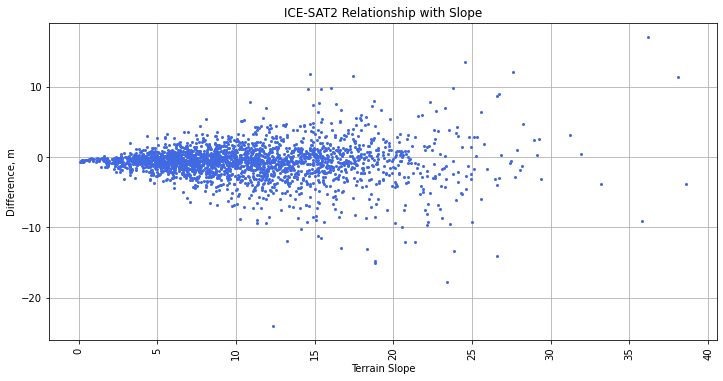

In [4]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()

ax.plot(summer_2020['slope_aso'], summer_2020['difference'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');

#plt.grid()
ax.set_ylabel('Difference, m');
ax.set_xlabel('Terrain Slope');
ax.set_title('ICE-SAT2 Relationship with Slope');
plt.xticks(rotation = 'vertical');
plt.grid()

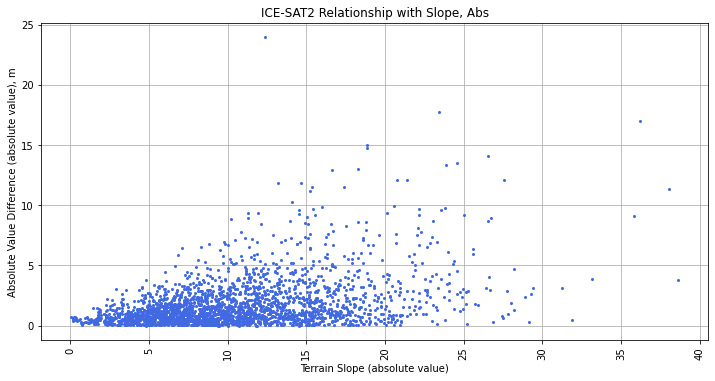

In [9]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()

ax.plot(summer_2020['slope_aso_abs'], summer_2020['difference_abs'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');

#plt.grid()
ax.set_ylabel('Absolute Value Difference (absolute value), m');
ax.set_xlabel('Terrain Slope (absolute value)');
ax.set_title('ICE-SAT2 Relationship with Slope, Abs');
plt.xticks(rotation = 'vertical');
plt.grid()

In [10]:
# use the linear regression function
mask = ~np.isnan(summer_2020.slope_aso_abs) & ~np.isnan(summer_2020.difference_abs)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(summer_2020.slope_aso_abs[mask], summer_2020.difference_abs[mask])

print('B0 : {}'.format(np.round(intercept,4)))
print('B1 : {}'.format(np.round(slope,4)))

print('R^2 : {}'.format(np.round(rvalue**2,3)))
print('R : {}'.format(np.round(rvalue,3)))
print('stderr : {}'.format(np.round(stderr,3)))

B0 : 0.1968
B1 : 0.144
R^2 : 0.161
R : 0.401
stderr : 0.007


In [11]:
x = summer_2020.slope_aso_abs # using x for shorthand below
y = summer_2020.difference_abs # using y for shorthand below

# Compute the SST for x
sst_x = np.sum( (x - np.mean(x))**2 )

# Compute the standard error
sigma = stderr * np.sqrt(sst_x)
print('sigma : {}'.format(np.round(sigma,3)))

sigma : 1.827


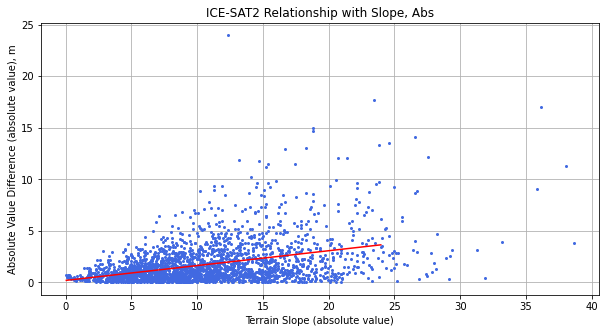

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

# Scatterplot
ax.plot(summer_2020['slope_aso_abs'], summer_2020['difference_abs'], 'o', markersize =2, color='royalblue', linestyle = 'none', label='Dana Meadows');


# Create points for the regression line
x = np.linspace(summer_2020.slope_aso_abs.min(), summer_2020.difference_abs.max(), summer_2020.difference_abs.size) # x coordinates from min and max values of SLI_max
y = slope * x + intercept # y coordinates using the slope and intercept from our linear regression

# Plot the regression line
ax.plot(x, y, '-r')

ax.set_ylabel('Absolute Value Difference (absolute value), m');
ax.set_xlabel('Terrain Slope (absolute value)');
ax.set_title('ICE-SAT2 Relationship with Slope, Abs');


plt.grid()